In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
ratings = pd.read_csv('D:/recommendation_sys/ml-latest-small/ratings.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_title = pd.read_csv('D:/recommendation_sys/ml-latest-small/movies.csv')

In [8]:
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df = pd.merge(ratings,movie_title,on='movieId')

In [13]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [38]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Using the average ratings of the movies for the users who haven't rated some movies

In [16]:
ratings_ = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [18]:
ratings_['ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_.head()

,rating,ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Using the average ratings of the users for the movies who havent rated some movies

In [7]:
ratings_usr_avg = pd.DataFrame(df.groupby('userId')['rating'].mean())
ratings_usr_avg.head()

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364


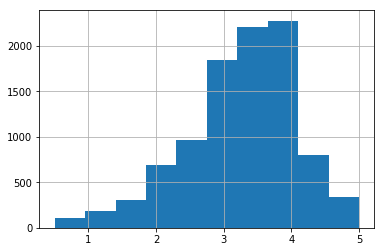

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_['rating'].hist()

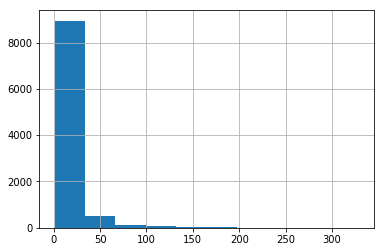

In [21]:
ratings_['ratings'].hist()

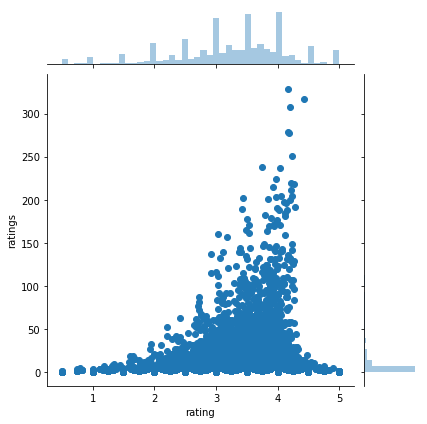

In [23]:
import seaborn as sns
sns.jointplot(x='rating',y = 'ratings', data = ratings_)

More the number of ratings higher the rating. Thus it has a linear relationship.

In [24]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace NaN with average user rating

In [27]:
#movie_matrix.fillna(movie_matrix.mean(axis=1))
movie_matrix.apply(lambda row: row.fillna(row.mean(),inplace=True), axis=1)
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [28]:
ratings_.sort_values('ratings', ascending=False).head(10)

,rating,ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [29]:
JP_user_rating = movie_matrix['Jurassic Park (1993)']
contact_user_rating = movie_matrix['Matrix, The (1999)']

In [30]:
JP_user_rating.head()


userId
1    4.000000
2    3.948276
3    2.435897
4    3.555556
5    3.636364
Name: Jurassic Park (1993), dtype: float64

In [31]:
similar_to_jp=movie_matrix.corrwith(JP_user_rating)

In [32]:
similar_to_jp.head()

title
'71 (2014)                                 0.655346
'Hellboy': The Seeds of Creation (2004)    0.652858
'Round Midnight (1986)                     0.653335
'Salem's Lot (2004)                        0.650582
'Til There Was You (1997)                  0.649844
dtype: float64

In [33]:
# corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
# corr_contact.dropna(inplace=True)
# corr_contact.head()
corr_JP = pd.DataFrame(similar_to_jp, columns=['correlation'])
corr_JP.dropna(inplace=True)
corr_JP.head()

,correlation
title,
'71 (2014),0.655346
'Hellboy': The Seeds of Creation (2004),0.652858
'Round Midnight (1986),0.653335
'Salem's Lot (2004),0.650582
'Til There Was You (1997),0.649844


In [35]:
corr_JP = corr_JP.join(ratings_['ratings'])

In [36]:
corr_JP.head()

,correlation,ratings
title,,
'71 (2014),0.655346,1
'Hellboy': The Seeds of Creation (2004),0.652858,1
'Round Midnight (1986),0.653335,2
'Salem's Lot (2004),0.650582,1
'Til There Was You (1997),0.649844,2


In [51]:
corr_JP[corr_JP['number of ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
Mission: Impossible (1996),0.451929,162
Die Hard (1988),0.451241,145
X-Men (2000),0.448910,133
Twister (1996),0.440167,123
